# TesorFlow 基础


TensorFlow 是一个面向深度学习算法的科学计算库，内部数据保存在张量(Tensor)对象上，所有的运算操作(Operation，简称 OP)也都是基于张量对象进行的。复杂的神经网络算法本质上就是各种张量相乘、相加等基本运算操作的组合

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, datasets, preprocessing
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

# Default parameters for plots
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.titlesize'] = 20
matplotlib.rcParams['figure.figsize'] = [9, 7]
matplotlib.rcParams['font.family'] = ['STKaiTi']
matplotlib.rcParams['axes.unicode_minus']=False 

np.set_printoptions(threshold=16, suppress=True, precision=4)

gpus = tf.config.experimental.list_physical_devices('GPU')
try:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
except RuntimeError as e:
    print(e)

## 1 数据类型
### 1.1数值类型

数值类型的张量是 TensorFlow 的主要数据载体，根据维度数来区分，可分为：
- 标量(scalar): 单个的实数，如 1.2, 3.4 等，维度(Dimension)数为 0，shape 为[]
- 向量(vector): 𝑛个实数的有序集合，通过中括号包裹，如\[1.2\]，\[1.2, 3.4\]等，维度数为1，长度不定，shape为\[n\]
- 张量(Tensor): 所有维度数dim > 2的数组统称为张量. 张量的每个维度也作轴(axis), 一般维度代表了具体的物理含义.
  \[2, 32, 32, 3\] -> 2张图片,高宽均为32,有RGB3个通道

在 TensorFlow 中间，为了表达方便，一般把标量、向量、矩阵也统称为张量，不作区分，需要根据张量的维度数或形状自行判断

In [2]:
# 标量
a = 2.4
aa = tf.constant(1.2)  # 需要使用tf的方式创建张量, 否则不能使用tf的功能函数
type(a), type(aa), tf.is_tensor(aa)

(float, tensorflow.python.framework.ops.EagerTensor, True)

In [4]:
# 向量
a = tf.constant([1, 2])  # 向量的定义须通过 List 容器传给constant()函数
a

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 2], dtype=int32)>

In [5]:
b = tf.constant([1, 2.1])
b

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1. , 2.1], dtype=float32)>

In [6]:
b.numpy()  # 返回numpy类型数据

array([1. , 2.1], dtype=float32)

In [8]:
# 定义矩阵
a = tf.constant([[1, 2], [3, 4]])
a, a.shape

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4]], dtype=int32)>,
 TensorShape([2, 2]))

In [9]:
# 3维的张量
a = tf.constant([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
a

<tf.Tensor: shape=(2, 2, 2), dtype=int32, numpy=
array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]], dtype=int32)>

### 1.2 字符串(String)类型


In [2]:
s = tf.constant('Hello, TensorFlow')
s

<tf.Tensor: shape=(), dtype=string, numpy=b'Hello, TensorFlow'>

In [3]:
tf.strings.lower(s), tf.strings.upper(s)

(<tf.Tensor: shape=(), dtype=string, numpy=b'hello, tensorflow'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'HELLO, TENSORFLOW'>)

In [4]:
tf.strings.split(s)

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'Hello,', b'TensorFlow'], dtype=object)>

### 1.3 布尔(Boolean)类型

In [5]:
a = tf.constant(True)
a

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [6]:
b = tf.constant([True, False])
b

<tf.Tensor: shape=(2,), dtype=bool, numpy=array([ True, False])>

In [7]:
# tensorflow 的bool类型与python的bool类型不等价
a is True

False

In [8]:
a == True  # 数值比较

<tf.Tensor: shape=(), dtype=bool, numpy=True>

## 2 数值精度
对于数值类型的张量，可以保存为不同字节长度的精度,位越长，精度越高，同时占用的内存空间也就越大。常用的精度类型有 tf.int16、tf.int32、tf.int64、tf.float16、tf.float32、tf.float64(tf.double)等，

In [9]:
# 制定数值的精度
a = tf.constant(123456789, dtype=tf.int16)  # -32768 ~ +32767
b = tf.constant(123456789, dtype=tf.int32)
a, b

(<tf.Tensor: shape=(), dtype=int16, numpy=-13035>,
 <tf.Tensor: shape=(), dtype=int32, numpy=123456789>)

In [10]:
import numpy as np

pi_1 = tf.constant(np.pi, dtype=tf.float32)
pi_2 = tf.constant(np.pi, dtype=tf.float64)
pi_1, pi_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1415927>,
 <tf.Tensor: shape=(), dtype=float64, numpy=3.141592653589793>)

大部分深度学习算法，一般使用 tf.int32 和 tf.float32 可满足大部分场合的运算精度要求(默认都是int32与float32)

In [28]:
# dtype 成员属性可以判断张量的保存精度

print('before:', pi_1.dtype)
if pi_1.dtype != tf.float64:
    pi_1 = tf.cast(pi_1, tf.float64)  # 转化精度
print('after:', pi_1.dtype)

before: <dtype: 'float32'>
after: <dtype: 'float64'> tf.Tensor(3.1415927410125732, shape=(), dtype=float64)


In [11]:
# 类型转换 
# 低->高
a = tf.constant(np.pi, dtype=tf.float16)
tf.cast(a, tf.double)

<tf.Tensor: shape=(), dtype=float64, numpy=3.140625>

In [12]:
# 高 ->低　溢出风险
a = tf.constant(123456789, tf.int32)
tf.cast(a, tf.int16)

<tf.Tensor: shape=(), dtype=int16, numpy=-13035>

In [13]:
# bool -> int
a = tf.constant([True, False])
tf.cast(a, tf.int32)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 0], dtype=int32)>

In [14]:
# int -> bool
a = tf.constant([1, -1, 0, 2])  # 0 为False 其他皆为True
tf.cast(a, tf.bool)

<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True,  True, False,  True])>

## 3 待优化的张量
为了区分需要计算梯度信息的张量与不需要计算梯度信息的张量，TensorFlow 增加了一种专门的数据类型来支持梯度信息的记录：tf.Variable. 它在普通张量类型基础上添加了name, trainable等属性来支持计算图的构建.

对于不需要的优化的张量，如神经网络的输入𝑿，不需要通过 tf.Variable 封装；相反，对于需要计算梯度并优化的张量，如神经网络层的𝑾和𝒃，需要通过 tf.Variable 包裹以便 TensorFlow 跟踪相关梯度信息。
通过 tf.Variable()函数可以将普通张量转换为待优化张量，例如：

In [15]:
a = tf.constant([1, -1, 2, 0])
aa = tf.Variable(a)  # 转为Variable类型

In [16]:
aa.name  # 用于命名计算图中的变量, 内部维护

'Variable:0'

In [17]:
aa.trainable  # 表征当前张量是否需要被优化

True

In [18]:
# 直接创建tf.Variable类型
a = tf.Variable([[1, 2], [3, 4]])
a

<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

待优化张量可视为普通张量的特殊类型，普通张量其实也可以通过`GradientTape.watch()`方法临时加入跟踪梯度信息的列表，从而支持自动求导功能

## 4 创建张量


In [19]:
# 从数组 列表 创建
tf.convert_to_tensor([1, 2.])

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 2.], dtype=float32)>

In [20]:
# 从numpy数组中创建

tf.convert_to_tensor(np.array([[1, 2.], [3, 4.]]))  # numpy 浮点型默认float64

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[1., 2.],
       [3., 4.]])>

In [21]:
# 全零向量
tf.zeros([3])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>

In [22]:
# 全1向量
tf.ones([2, 2, 3])

<tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=
array([[[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)>

In [23]:
a = tf.constant([[1, 2], [3, 4]])
tf.zeros_like(a)  # 与某个张量一致

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[0, 0],
       [0, 0]], dtype=int32)>

In [24]:
tf.ones_like(a)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 1],
       [1, 1]], dtype=int32)>

In [25]:
# 自定义数值的张量

tf.fill([2, 2], 11)  # 2行2列 数值都为11

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[11, 11],
       [11, 11]], dtype=int32)>

In [26]:
# 指定概率分布
# 正态分布 均值0 标准差1 shape: (2, 3)
tf.random.normal([2, 3], mean=0.0, stddev=1.0)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 0.33070412, -1.2998165 , -0.9255365 ],
       [-1.2821348 , -0.93905365, -1.1543428 ]], dtype=float32)>

In [27]:
# 采样自[0, 1]的均匀分布

tf.random.uniform([6])

<tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.8141229 , 0.2862265 , 0.4847622 , 0.07810807, 0.58806574,
       0.13367999], dtype=float32)>

In [28]:
# 采样自区间[0,10)，shape 为[2,2]的矩阵
tf.random.uniform([2, 2], maxval=10)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[9.619311, 9.898686],
       [9.006266, 9.290047]], dtype=float32)>

In [29]:
# 类型为整数
tf.random.uniform([2, 2], maxval=100, dtype=tf.int32)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[22, 48],
       [ 3, 13]], dtype=int32)>

In [30]:
# 创建序列
tf.range(10)  # np.arange(10)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [31]:
tf.range(10, delta=2)  # 指定步长

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 2, 4, 6, 8], dtype=int32)>

## 5 张量的典型应用
---
### 标量
标量是简单的数字, 维度数为0, shape为[].典型用途是表示各种`误差值`, `测量指标`, 如精确度(Accuracy, acc), 查准度(Precisoin)和查全率(Recall).


In [32]:
out = tf.random.uniform([4, 10])  # 随机模拟网络输出
y = tf.constant([2, 3, 2, 0])  # 随机构造样本真实标签
y = tf.one_hot(y, depth=10)  # one-hot编码处理
loss = tf.keras.losses.mse(y, out)  # 计算每个样本的MSE
loss = tf.reduce_mean(loss)  # 平均MSE
loss

<tf.Tensor: shape=(), dtype=float32, numpy=0.36886328>

### 向量

向量是一种非常常见的数据载体，如在全连接层和卷积神经网络层中，偏置张量𝒃就使用向量来表示.

例: 2个输出节点的网络层, 创建长度为2的偏置向量**b**, 并累加在每个输出节点上


In [33]:
# z = wx , 模拟z
z = tf.random.normal([4, 2])
b = tf.zeros([2])
z = z + b  # 累加偏置向量
z

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[ 1.2154839 , -0.13426471],
       [-0.1373093 ,  0.83707845],
       [ 1.8495959 , -0.5648319 ],
       [-0.5233701 ,  1.2768668 ]], dtype=float32)>

In [34]:
# 创建一层网络层 张量𝑾和𝒃存储在类的内部，由类自动创建和管理
fc = layers.Dense(3)  # 创建一层Wx + b, 输出节点为3个
# 通过 build 函数创建 W,b 张量，输入节点为 4
fc.build(input_shape=(2, 4))
fc.bias  # 查看偏置向量
# 类型为Variable(待优化), 向量的值初始化为0

<tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>

### 矩阵

例如全连接层的批量输入张量$X$的形状为$[b, d_{in}]$, b表示输入样本的个数(Batch size), $d_{in}$表示输入特征的长度.


In [35]:
# 线性变换网络层, 激活函数为空
X = tf.random.normal([2, 4])  # 2个样本, 特征长度4
w = tf.ones([4, 3])
b = tf.zeros([3])

out = X@w + b
out

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[-0.07032794, -0.07032794, -0.07032794],
       [-2.0724502 , -2.0724502 , -2.0724502 ]], dtype=float32)>

X 和 w张量都是矩阵. 。一般地，$\sigma(X@W + b)$网络层称为`全连接层`，在 TensorFlow 中可以通过`Dense`类直接实现，特别地，当激活函数𝜎为空时，全连接层也称为`线性层`。

In [36]:
fc = layers.Dense(3) # 定义全连接层的输出节点为 3
fc.build(input_shape=(2,4)) # 定义全连接层的输入节点为 4
fc.kernel # 查看权值矩阵

<tf.Variable 'kernel:0' shape=(4, 3) dtype=float32, numpy=
array([[ 0.59064364,  0.9121344 ,  0.6652602 ],
       [-0.55234253,  0.15975511,  0.26595378],
       [-0.11956185,  0.77510226, -0.0103429 ],
       [ 0.8747679 , -0.36924678, -0.4446111 ]], dtype=float32)>

### 三维张量
三维张量的一个典型应用是表示`序列信号`, 格式是:
$$X = [b, sequence \; len, feature \; len]$$

其中𝑏表示序列信号的数量，sequence len 表示序列信号在时间维度上的采样点数或步数，feature len 表示每个点的特征长度.

考虑自然语言处理(Natural Language Processing，简称 NLP)中句子的表示，如评价句子的是否为正面情绪的情感分类任务网络。为了能够方便字符串被神经网络处理，一般将单词通过嵌入层(Embedding Layer)编码为固定长度的向量，比如“a”编码为某个长度 3 的向量，那么 2 个等长(单词数量为 5)的句子序列可以表示为 shape 为\[2,5,3\]的 3 维张量，其中 2 示句子个数，5 表示单词数量，3 表示单词向量的长度

![](./情感分类网络.png)

In [37]:
# imdb 电影评价数据集
(X_train, y_train), *_ = datasets.imdb.load_data(num_words=10000)

In [38]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [39]:
# 将句子填充 截断为等长的80个单词的句子
X_train = preprocessing.sequence.pad_sequences(X_train, maxlen=80)

In [40]:
X_train.shape  # (句子个数, 每个句子单词数)每个单词用数字编码的方式表示 

(25000, 80)

```
tf.keras.layers.Embedding(
    input_dim, output_dim, embeddings_initializer='uniform',
    embeddings_regularizer=None, activity_regularizer=None,
    embeddings_constraint=None, mask_zero=False, input_length=None, **kwargs
)
```

- input_dim: int > 0. Size of the vocabulary, i.e. maximum integer index + 1.
- output_dim: int >= 0. Dimension of the dense embedding.

In [41]:
# 创建词向量 embedding层
embedding = layers.Embedding(10000, 100)  # 每个单词都编码成长度100的向量

In [42]:
out = embedding(X_train)
out.shape  

TensorShape([25000, 80, 100])

### 四维张量
四维张量在卷积神经网络中应用非常广泛，它用于保存`特征图`(Feature maps)数据，格式一般定义为
$$[b, h, w, c]$$
b表示输入样本的数量, h/w分别表示特征图的高/宽, c表示特征图的通道数.部分深度学习框架也会使用\[𝑏, 𝑐, ℎ, w\]格式的特征图张量，例如 PyTorch.

In [43]:
# 32x32彩色图片, 数量为4
X = tf.random.normal([4, 32, 32, 3])
# 创建卷积神经网络
layer = layers.Conv2D(16, kernel_size=3)
out = layer(X)  # 前向计算
out.shape  # 输出大小

TensorShape([4, 30, 30, 16])

In [44]:
layer.kernel.shape  # 卷积核张量 

TensorShape([3, 3, 3, 16])

## 索引与切片

与numpy中的索引和切片类似

In [45]:
X = tf.random.normal([4, 32, 32, 3])

In [47]:
X[0][-1]  # 第一张图片 最后一行

<tf.Tensor: shape=(32, 3), dtype=float32, numpy=
array([[ 0.38626292,  0.48458055,  0.9753598 ],
       [ 0.6152168 , -0.8783054 ,  1.1422373 ],
       [ 1.5227828 ,  1.3751835 , -0.72983044],
       [-0.6166592 ,  0.49567157, -0.5693984 ],
       [-1.3355407 , -0.9289913 , -1.8335633 ],
       [-1.1912423 ,  0.01054767, -1.4341239 ],
       [ 0.30111122,  0.15251623, -0.3987652 ],
       [-0.29142419,  0.611255  ,  0.16753303],
       [-0.10661095, -0.55688256, -2.7441502 ],
       [-0.99143326, -0.13468826, -0.0131203 ],
       [ 0.50020736, -1.2164325 ,  1.9222027 ],
       [ 0.95121336, -0.94877595,  0.56226194],
       [-0.21165627, -1.1136016 , -1.2494175 ],
       [-1.0335566 ,  0.773933  ,  0.05813967],
       [-0.9157892 , -0.95739913, -0.07989726],
       [ 0.5002486 ,  1.5189123 ,  1.4757575 ],
       [-0.60369754,  0.36891344, -0.14120743],
       [-1.7896798 ,  0.6288549 ,  1.5512767 ],
       [-2.5050373 ,  0.5114778 ,  0.8379579 ],
       [ 1.8362858 ,  0.35752925,  0.97

In [48]:
X[0, 1, 2, 1]  # 第一张图片, 2行3列B通道 颜色强度值

<tf.Tensor: shape=(), dtype=float32, numpy=-0.8416042>

In [50]:
# start: end: step
X[0, 1:3, :8:2, :]

<tf.Tensor: shape=(2, 4, 3), dtype=float32, numpy=
array([[[-0.1756,  1.4343,  0.3572],
        [-1.8175, -0.8416,  1.6837],
        [-2.1726,  0.3714,  0.4909],
        [ 1.4304,  1.4152, -0.6769]],

       [[ 0.1144,  1.5118,  0.1508],
        [ 1.3896,  1.543 , -1.93  ],
        [-0.8983, -0.5082,  0.7367],
        [ 0.7095, -1.0134, -0.1436]]], dtype=float32)>

In [51]:
# 使用⋯符号表示取多个维度上所有的数据，其中维度的数量需根据规则自动推断
X[0:2, ..., 1]  # 高和宽全部采集

<tf.Tensor: shape=(2, 32, 32), dtype=float32, numpy=
array([[[-1.0976, -1.6566,  0.6943, ...,  0.7708, -1.412 ,  0.3265],
        [ 1.4343, -0.1896, -0.8416, ...,  0.8973,  1.2024,  1.2788],
        [ 1.5118,  0.0038,  1.543 , ..., -1.2033, -0.9243,  1.0292],
        ...,
        [-0.7541, -2.0584,  2.4961, ...,  0.7793, -0.9003, -0.9882],
        [-0.4767, -0.9161, -0.8443, ..., -0.7434,  0.9984,  0.0643],
        [ 0.4846, -0.8783,  1.3752, ..., -1.0073, -1.0206,  0.5973]],

       [[ 0.0845, -1.3828, -0.1253, ..., -0.6026, -0.9142, -1.0079],
        [ 0.1749,  0.6091,  0.7482, ..., -0.0227, -0.3177, -0.3681],
        [ 1.2783, -0.3136,  1.6343, ...,  0.1607, -1.0614, -0.1347],
        ...,
        [-0.3303, -0.685 ,  1.6297, ...,  1.6337,  1.3217,  1.5199],
        [-0.8877, -0.0002, -1.9721, ..., -1.4153,  0.046 ,  1.7619],
        [ 0.9173, -2.0606,  0.6922, ..., -0.1284,  1.2786, -0.2942]]],
      dtype=float32)>

In [52]:
X[-2:, ...]  # 最后2张图片

<tf.Tensor: shape=(2, 32, 32, 3), dtype=float32, numpy=
array([[[[ 0.4494,  0.8135, -0.7077],
         [ 0.6427,  0.8531,  1.9176],
         [ 0.59  ,  0.3249, -0.7983],
         ...,
         [ 0.632 ,  0.2936,  1.186 ],
         [-1.3732,  0.4363,  0.8158],
         [ 0.6319,  1.6061, -0.61  ]],

        [[-1.0711, -1.3315, -0.4079],
         [ 0.2425, -0.4494, -0.2964],
         [-0.0149, -0.9606, -0.3528],
         ...,
         [ 1.0203, -0.4396,  0.9588],
         [ 1.3297,  0.67  ,  2.0149],
         [-0.2295, -0.4115, -0.2137]],

        [[ 0.4033, -0.7814, -0.2517],
         [ 0.544 , -1.4219, -0.7449],
         [-0.2854,  0.726 , -1.0103],
         ...,
         [ 1.8681,  0.4935, -0.3727],
         [-0.7118,  0.0807,  3.0895],
         [-0.103 , -0.183 , -0.2882]],

        ...,

        [[ 2.0299, -0.0994, -1.8217],
         [-0.7688, -0.5339, -1.3172],
         [ 1.1124, -0.8966, -0.3222],
         ...,
         [-1.7915, -0.102 ,  1.0022],
         [-0.4167, -1.3346,  0.2

In [53]:
X[..., :2]  # 所有图片前2个通道

<tf.Tensor: shape=(4, 32, 32, 2), dtype=float32, numpy=
array([[[[-0.9676, -1.0976],
         [ 0.3849, -1.6566],
         [-0.9155,  0.6943],
         ...,
         [ 0.8401,  0.7708],
         [ 0.1111, -1.412 ],
         [ 0.1091,  0.3265]],

        [[-0.1756,  1.4343],
         [-1.7394, -0.1896],
         [-1.8175, -0.8416],
         ...,
         [ 0.1745,  0.8973],
         [ 0.0008,  1.2024],
         [-0.5203,  1.2788]],

        [[ 0.1144,  1.5118],
         [ 1.6678,  0.0038],
         [ 1.3896,  1.543 ],
         ...,
         [ 0.4403, -1.2033],
         [-0.0553, -0.9243],
         [-0.9238,  1.0292]],

        ...,

        [[ 1.142 , -0.7541],
         [-0.5814, -2.0584],
         [ 1.2934,  2.4961],
         ...,
         [ 0.0072,  0.7793],
         [-0.098 , -0.9003],
         [-1.2378, -0.9882]],

        [[-1.3678, -0.4767],
         [-0.4042, -0.9161],
         [ 1.7686, -0.8443],
         ...,
         [-0.6023, -0.7434],
         [ 1.4283,  0.9984],
         [-

## 维度变换
---
张量的存储(Storage)和视图(View):
- 视图就是我们理解张量的方式
- 存储体现在张量在内存上保存为一段连续的内存区域
- 同一个存储, 从不同角度观察数据可以产生不同的视图

In [55]:
# reshape 改变视图  numpy reshape

X = tf.range(96)
X = tf.reshape(X, [2, 4, 4, 3])
X

<tf.Tensor: shape=(2, 4, 4, 3), dtype=int32, numpy=
array([[[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17],
         [18, 19, 20],
         [21, 22, 23]],

        [[24, 25, 26],
         [27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41],
         [42, 43, 44],
         [45, 46, 47]]],


       [[[48, 49, 50],
         [51, 52, 53],
         [54, 55, 56],
         [57, 58, 59]],

        [[60, 61, 62],
         [63, 64, 65],
         [66, 67, 68],
         [69, 70, 71]],

        [[72, 73, 74],
         [75, 76, 77],
         [78, 79, 80],
         [81, 82, 83]],

        [[84, 85, 86],
         [87, 88, 89],
         [90, 91, 92],
         [93, 94, 95]]]], dtype=int32)>

在存储数据时，内存并不支持这个维度层级概念，只能以平铺方式按序写入内存. 在优先写入小维度的设定下，上述张量的内存布局为

0, 1, 2, 3, ..., 95

在通过 reshape 改变视图时，必须始终记住张量的存储顺序，新视图的维度顺序不能与存储顺序相悖，否则需要通过交换维度操作将存储顺序同步过来

In [56]:
X.ndim, X.shape  # 获取维度和形状

(4, TensorShape([2, 4, 4, 3]))

In [57]:
tf.reshape(X, [4, -1])  # -1当前轴上长度需要根据张量总元素不变的法则自动推导，

<tf.Tensor: shape=(4, 24), dtype=int32, numpy=
array([[ 0,  1,  2, ..., 21, 22, 23],
       [24, 25, 26, ..., 45, 46, 47],
       [48, 49, 50, ..., 69, 70, 71],
       [72, 73, 74, ..., 93, 94, 95]], dtype=int32)>

In [3]:
# 增加维度  增加一个长度为 1 的维度相当于给原有的数据添加一个新维度的概念
# 28x28的灰度图片
x = tf.random.uniform([28, 28], maxval=255, dtype=tf.int32)
x

<tf.Tensor: shape=(28, 28), dtype=int32, numpy=
array([[227,  14,  78, ...,  22,  49, 208],
       [ 60,   8, 147, ..., 105,   7,  15],
       [ 63, 191, 251, ..., 147, 206, 139],
       ...,
       [193, 186, 231, ..., 251, 212, 183],
       [ 84,  71, 155, ..., 201, 207, 227],
       [229, 205, 187, ...,  59,  71, 136]], dtype=int32)>

In [4]:
x = tf.expand_dims(x, axis=2)  # axis=2 表示宽维度后面的一个维度
x

<tf.Tensor: shape=(28, 28, 1), dtype=int32, numpy=
array([[[227],
        [ 14],
        [ 78],
        ...,
        [ 22],
        [ 49],
        [208]],

       [[ 60],
        [  8],
        [147],
        ...,
        [105],
        [  7],
        [ 15]],

       [[ 63],
        [191],
        [251],
        ...,
        [147],
        [206],
        [139]],

       ...,

       [[193],
        [186],
        [231],
        ...,
        [251],
        [212],
        [183]],

       [[ 84],
        [ 71],
        [155],
        ...,
        [201],
        [207],
        [227]],

       [[229],
        [205],
        [187],
        ...,
        [ 59],
        [ 71],
        [136]]], dtype=int32)>

In [5]:
x = tf.expand_dims(x, axis=0)
x

<tf.Tensor: shape=(1, 28, 28, 1), dtype=int32, numpy=
array([[[[227],
         [ 14],
         [ 78],
         ...,
         [ 22],
         [ 49],
         [208]],

        [[ 60],
         [  8],
         [147],
         ...,
         [105],
         [  7],
         [ 15]],

        [[ 63],
         [191],
         [251],
         ...,
         [147],
         [206],
         [139]],

        ...,

        [[193],
         [186],
         [231],
         ...,
         [251],
         [212],
         [183]],

        [[ 84],
         [ 71],
         [155],
         ...,
         [201],
         [207],
         [227]],

        [[229],
         [205],
         [187],
         ...,
         [ 59],
         [ 71],
         [136]]]], dtype=int32)>

axis 为正时，表示在当前维度之前插入一个新维度；为负时，表示当前维度之后插入一个新的维度

![](./增加维度.png)

In [6]:
# 删除维度只能删除长度为 1 的维度，
x = tf.squeeze(x, axis=0)
x

<tf.Tensor: shape=(28, 28, 1), dtype=int32, numpy=
array([[[227],
        [ 14],
        [ 78],
        ...,
        [ 22],
        [ 49],
        [208]],

       [[ 60],
        [  8],
        [147],
        ...,
        [105],
        [  7],
        [ 15]],

       [[ 63],
        [191],
        [251],
        ...,
        [147],
        [206],
        [139]],

       ...,

       [[193],
        [186],
        [231],
        ...,
        [251],
        [212],
        [183]],

       [[ 84],
        [ 71],
        [155],
        ...,
        [201],
        [207],
        [227]],

       [[229],
        [205],
        [187],
        ...,
        [ 59],
        [ 71],
        [136]]], dtype=int32)>

In [7]:
x = tf.squeeze(x, axis=2)
x

<tf.Tensor: shape=(28, 28), dtype=int32, numpy=
array([[227,  14,  78, ...,  22,  49, 208],
       [ 60,   8, 147, ..., 105,   7,  15],
       [ 63, 191, 251, ..., 147, 206, 139],
       ...,
       [193, 186, 231, ..., 251, 212, 183],
       [ 84,  71, 155, ..., 201, 207, 227],
       [229, 205, 187, ...,  59,  71, 136]], dtype=int32)>

In [8]:
# 不指定维度参数 axis，即 tf.squeeze(x)，那么它会默认删除所有长度为 1 的维度
x = tf.random.uniform([1, 8, 8, 1])
tf.squeeze(x)

<tf.Tensor: shape=(8, 8), dtype=float32, numpy=
array([[0.0162, 0.8471, 0.3252, ..., 0.0686, 0.8832, 0.1266],
       [0.1285, 0.9692, 0.2529, ..., 0.5457, 0.2686, 0.8352],
       [0.7545, 0.0208, 0.6539, ..., 0.5697, 0.6033, 0.9746],
       ...,
       [0.2471, 0.9987, 0.9648, ..., 0.4483, 0.3133, 0.7795],
       [0.0709, 0.8017, 0.9218, ..., 0.0332, 0.8879, 0.0278],
       [0.3776, 0.4904, 0.1002, ..., 0.3115, 0.7275, 0.3854]],
      dtype=float32)>

In [9]:
# 交换维度 transpose
x = tf.random.normal([2, 32, 32, 3])  # b, h, w, c -> b, c, h, w
tf.transpose(x, perm=[0, 3, 1, 2])

<tf.Tensor: shape=(2, 3, 32, 32), dtype=float32, numpy=
array([[[[ 1.6445, -0.2121, -1.0621, ...,  1.121 ,  0.9723,  1.4606],
         [ 0.868 , -0.4396, -1.2934, ...,  1.777 ,  0.8638,  2.306 ],
         [ 0.003 ,  0.0575,  1.9425, ...,  2.4887, -0.7341,  0.8839],
         ...,
         [-0.0633,  0.8911,  0.3263, ...,  0.2943, -0.3763, -2.0715],
         [-0.1403, -1.203 , -0.8123, ..., -0.4894, -1.0556, -1.6299],
         [-1.7972, -1.2354, -0.1114, ...,  1.2531, -1.6232,  0.8396]],

        [[-0.9919,  0.1023,  1.4613, ..., -1.6071,  1.4713, -2.1798],
         [ 0.3426,  0.6119,  0.5327, ..., -0.4732, -1.1353,  0.1271],
         [-0.9392,  1.004 ,  0.2645, ...,  0.8801, -0.2601,  0.4133],
         ...,
         [-1.2034, -0.7826, -0.9239, ..., -0.2851, -1.1869,  0.2215],
         [-2.3126, -0.8373,  1.0206, ...,  0.8212, -0.3453, -2.0803],
         [ 0.5528, -0.6221, -1.6782, ..., -2.0969,  0.1865, -0.3055]],

        [[-0.6711,  0.3085, -0.5608, ..., -1.8704,  0.3606, -0.8953],
  

通过 tf.transpose 完成维度交换后，张量的存储顺序已经改变，视图也随之改变，后续的所有操作必须基于新的存续顺序和视图进行。相对于改变视图操作，维度交换操作的计算代价更高

In [10]:
# 复制数据
b = tf.constant([1, 2, 3])  # (3, )
b = tf.expand_dims(b, axis=0)  # 插入新维度 -> (1, 3)
b

<tf.Tensor: shape=(1, 3), dtype=int32, numpy=array([[1, 2, 3]], dtype=int32)>

In [11]:
b = tf.tile(b, multiples=[2, 1])  # 0轴复制一次 1轴不复制
b

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [1, 2, 3]], dtype=int32)>

In [13]:
# 自动实现插入维度

x = tf.range(4)
x = tf.reshape(x, [2, 2])
x

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[0, 1],
       [2, 3]], dtype=int32)>

In [14]:
tf.tile(x, multiples=[2, 1])  # 行复制一次

<tf.Tensor: shape=(4, 2), dtype=int32, numpy=
array([[0, 1],
       [2, 3],
       [0, 1],
       [2, 3]], dtype=int32)>

In [15]:
tf.tile(x, multiples=[1, 2])  # 列复制一次

<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[0, 1, 0, 1],
       [2, 3, 2, 3]], dtype=int32)>

In [16]:
tf.tile(x, [2, 2])

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[0, 1, 0, 1],
       [2, 3, 2, 3],
       [0, 1, 0, 1],
       [2, 3, 2, 3]], dtype=int32)>

## Broadcasting 广播(自动扩展)

类似numpy 中的广播机制

In [18]:
x = tf.random.normal([2, 4])
w = tf.random.normal([4, 3])
b = tf.random.normal([3])

y = x @ w + b  # broadcasting
y

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.6466,  0.5488,  3.4398],
       [ 1.0131,  2.4012, -0.0811]], dtype=float32)>

In [19]:
y = x @ w + tf.broadcast_to(b, [2,3])# 手动广播
y

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.6466,  0.5488,  3.4398],
       [ 1.0131,  2.4012, -0.0811]], dtype=float32)>

Broadcasting 机制的核心思想是普适性，即同一份数据能普遍适合于其他位置。在验证普适性之前，需要先将张量 shape 靠右对齐，然后进行普适性判断：对于长度为 1 的维度，默认这个数据普遍适合于当前维度的其他位置；对于不存在的维度，则在增加新维度后默认当前数据也是普适于新维度的，从而可以扩展为更多维度数、任意长度的张量形状

广播成功的例子:

![](./广播成功.png)

广播失败的例子:

![](./广播失败.png)


## 数学运算
--- 
加、减、乘、除是最基本的数学运算，分别通过 tf.add, tf.subtract, tf.multiply, tf.divide函数实现，TensorFlow 已经重载了+、 − 、 ∗ 、/运算符. 整除和取余数: //, %

In [20]:
a = tf.range(5)
b = tf.constant(2)
a // b

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 0, 1, 1, 2], dtype=int32)>

In [22]:
a % b

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 1, 0, 1, 0], dtype=int32)>

In [28]:
# 乘方 power
x = tf.range(1, 4)
tf.pow(x, 3)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([ 1,  8, 27], dtype=int32)>

In [29]:
x ** 2 , tf.square(x)

(<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 4, 9], dtype=int32)>,
 <tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 4, 9], dtype=int32)>)

In [30]:
# 开方
x = tf.constant([1., 4., 9.])
x ** (0.5), tf.sqrt(x)

(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>)

In [31]:
# 指数 tf.pow , ** 
x = tf.constant([1., 2, 3])
2 ** x

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([2., 4., 8.], dtype=float32)>

In [32]:
# 自然指数 e
tf.exp(1.)

<tf.Tensor: shape=(), dtype=float32, numpy=2.7182817>

In [35]:
# 自然对数
x = tf.exp(3.)
tf.math.log(x)

<tf.Tensor: shape=(), dtype=float32, numpy=3.0>

In [36]:
# 换底公式log10(x)
x = tf.constant([1., 2.])
x = 10 ** x
tf.math.log(x) / tf.math.log(10.)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 2.], dtype=float32)>

###  矩阵乘法
TensorFlow 中的矩阵相乘可以使用批量方式，也就是张量𝑨和𝑩的维度数可以大于 2。当张量𝑨和𝑩维度数大于 2 时，TensorFlow 会选择𝑨和𝑩的最后两个维度进行矩阵相乘，前面所有的维度都视作Batch 维度。

根据矩阵相乘的定义，𝑨和𝑩能够矩阵相乘的条件是，𝑨的倒数第一个维度长度(列)和𝑩的倒数第二个维度长度(行)必须相等。比如张量 a shape:\[4,3,28,32\]可以与张量 bshape:\[4,3,32,2\]进行矩阵相乘

In [2]:
a = tf.random.normal([4, 3, 28, 32])
b = tf.random.normal([4, 3, 32, 2])
a @ b

<tf.Tensor: shape=(4, 3, 28, 2), dtype=float32, numpy=
array([[[[ -1.0934,   2.2801],
         [  7.191 ,  -4.5564],
         [  5.615 ,  -0.7883],
         ...,
         [ -5.4651, -18.2195],
         [  1.4142,   1.4663],
         [ -1.1554,   1.713 ]],

        [[  2.5084,  -4.3073],
         [  4.7264,   9.0906],
         [  0.2972,   9.9935],
         ...,
         [ 13.4975,  -7.6285],
         [  1.6347,   3.6777],
         [  3.311 ,  -9.0082]],

        [[  3.1924,   6.1756],
         [ -3.6798,  12.1598],
         [  3.6036,  -4.7887],
         ...,
         [  2.2526,   2.4374],
         [ -0.6003,   8.3296],
         [ -8.5861,   7.0863]]],


       [[[  4.4293,   1.147 ],
         [  3.6171,   5.3617],
         [ 10.7696,   0.8449],
         ...,
         [  6.4209,   6.9002],
         [  6.4495,   6.3447],
         [ -1.5835,   4.6992]],

        [[  3.0381,   3.4137],
         [ -4.5553,   3.6361],
         [ -3.4704,  -3.2785],
         ...,
         [  1.2236,  -4.6076

In [3]:
# 矩阵乘法的自动广播

a = tf.random.normal([4, 3, 32])
b = tf.random.normal([32, 16])
tf.matmul(a, b)

<tf.Tensor: shape=(4, 3, 16), dtype=float32, numpy=
array([[[  2.9606,   2.2013,   0.0198, ...,   7.1217,  -7.1193,
           2.0865],
        [  5.6084,  10.2564,  -6.916 , ...,   0.1774,   2.428 ,
          -1.0326],
        [  0.3027,  -7.7884,   4.1111, ...,   4.1389,  -4.255 ,
           2.0816]],

       [[ -0.9867,  -2.1044,  -2.3265, ...,  -8.6665,   9.8111,
          -0.9919],
        [ -8.6593,   6.3916,   3.2853, ...,  11.795 ,  -7.6118,
          -8.131 ],
        [  4.2047,  -0.7984,   8.431 , ...,  -0.3777,  -3.4946,
           2.0063]],

       [[  9.9131,   2.8745,  -6.1947, ...,   9.8241,   6.1531,
          -0.6255],
        [  6.9507, -12.186 ,   6.8275, ..., -16.4829,  -2.0571,
           1.3972],
        [  1.1048,   2.4879,  -5.5001, ...,   6.224 ,   0.3461,
          -7.3151]],

       [[ -0.8993,   1.2174,  -7.5666, ...,   3.2458, -10.0192,
           3.5283],
        [  0.6466,  -4.6528,   2.4219, ...,   0.9483,  -0.5631,
          -9.5658],
        [ -0.5276,

## 前向传播实战

创建三层神经网络:
$$ out = ReLU\{ReLU\{ReLU[X@W_1+b_1]@W_2 + b_2\}@W_3 + b_3\}$$
输入节点784(28*28), 第一层输出256, 第二层输出128, 第三层输出10(10类)

In [26]:
(X, y), _ = datasets.mnist.load_data()

In [27]:
X[0].shape

(28, 28)

In [28]:
X = tf.convert_to_tensor(X, dtype=tf.float32) / 255.
y = tf.convert_to_tensor(y, dtype=tf.int32) 

In [29]:
# 每步梯度下降取处理128张图片
train_db = tf.data.Dataset.from_tensor_slices((X,y)).batch(128)
train_db

<BatchDataset shapes: ((None, 28, 28), (None,)), types: (tf.float32, tf.int32)>

In [30]:
# 每层w使用截断正态分布
w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1))
# 偏置b初始化为0
b1 = tf.Variable(tf.zeros([256]))

In [31]:
w2 = tf.Variable(tf.random.truncated_normal([256, 128], stddev=0.1))
b2 = tf.Variable(tf.zeros([128]))
w3 = tf.Variable(tf.random.truncated_normal([128, 10], stddev=0.1))
b3 = tf.Variable(tf.zeros([10]))

epoch:0, step:0, loss:0.4660964906215668
epoch:0, step:200, loss:0.19841830432415009
epoch:0, step:400, loss:0.16902323067188263
epoch:1, step:0, loss:0.14736661314964294
epoch:1, step:200, loss:0.15791429579257965
epoch:1, step:400, loss:0.1429259479045868
epoch:2, step:0, loss:0.12623052299022675
epoch:2, step:200, loss:0.13699081540107727
epoch:2, step:400, loss:0.12663671374320984
epoch:3, step:0, loss:0.11241404712200165
epoch:3, step:200, loss:0.12284965813159943
epoch:3, step:400, loss:0.11558668315410614
epoch:4, step:0, loss:0.10262427479028702
epoch:4, step:200, loss:0.11268937587738037
epoch:4, step:400, loss:0.10737975686788559
epoch:5, step:0, loss:0.09523322433233261
epoch:5, step:200, loss:0.10495035350322723
epoch:5, step:400, loss:0.10104880481958389
epoch:6, step:0, loss:0.08938302099704742
epoch:6, step:200, loss:0.09882988035678864
epoch:6, step:400, loss:0.09600754827260971
epoch:7, step:0, loss:0.08464780449867249
epoch:7, step:200, loss:0.0938461571931839
epoch:7

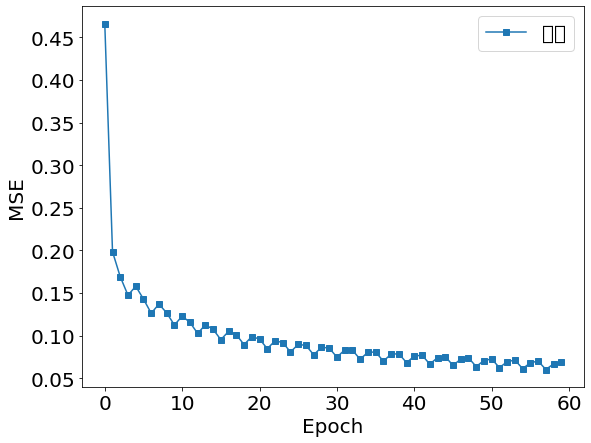

In [32]:
lr = 1e-3
losses = []

for epoch in range(20):
    for step , (x, y) in enumerate(train_db):
        x = tf.reshape(x, [-1, 28*28])
        with tf.GradientTape() as tape:
            # 第一层计算 [b, 784]@[784, 256] + [256] => [b, 256] + [256] => [b, 256] + [b, 256]
            h1 = x @ w1 + b1
            h1 = tf.nn.relu(h1)  # 通过激活函数(ReLU)
            
            h2 = h1 @ w2 + b2
            h2 = tf.nn.relu(h2)

            out = h2 @ w3 + b3
            
            y_onehot = tf.one_hot(y, depth=10)
            # 计算误差
            loss = tf.reduce_mean(tf.square(out - y_onehot))
        # 自动计算梯度 
        grads = tape.gradient(loss, [w1, b1, w2, b2, w3, b3])
        # 梯度更新，assign_sub 将当前值减去参数值，原地更新
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
        w2.assign_sub(lr * grads[2])
        b2.assign_sub(lr * grads[3])
        w3.assign_sub(lr * grads[4])
        b3.assign_sub(lr * grads[5])
        if step %  200 == 0:
            losses.append(loss)
            print(f'epoch:{epoch}, step:{step}, loss:{loss}')

plt.figure()
plt.plot(losses, color='C0', marker='s', label='训练')
plt.xlabel('Epoch')
plt.legend()
plt.ylabel('MSE')
plt.savefig('forward.svg')
# plt.show()
